Packages

In [1]:
import numpy as np
import os
from keras.preprocessing.image import load_img, img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.resnet50 import preprocess_input
from keras import Sequential
from keras.layers import Flatten, Dense, Conv2D, Dropout, BatchNormalization, Activation, MaxPooling2D
from keras import optimizers, regularizers
from keras.applications import VGG16

Using TensorFlow backend.


Loading Data

In [2]:
train_path = './data/train'
test_path = './data/test'
hot_dog_path = './data/train/hot_dog'
not_hot_dog_path = './data/train/not_hot_dog'

train_data_hd = [os.path.join(hot_dog_path, filename)\
                 for filename in os.listdir(hot_dog_path)]
train_data_nhd = [os.path.join(not_hot_dog_path, filename)\
                  for filename in os.listdir(not_hot_dog_path)]

Initialization

In [3]:
img_size = 150 #224
num_classes = 2 # hot dog or not hot dog

data_generator = ImageDataGenerator(rescale=1./255,
                                rotation_range=90,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                horizontal_flip=True,
                                shear_range=0.2,
                                zoom_range=0.2)

test_generator = ImageDataGenerator(rescale=1./255)

train_generator = data_generator.flow_from_directory(
    train_path,
    target_size=(img_size, img_size),
    batch_size=498, #498
    class_mode='binary') #categorical

validation_generator = test_generator.flow_from_directory(
    test_path,
    target_size=(img_size, img_size),
    batch_size=500, #500
    class_mode='binary') #categorical


def read_and_prep_images(img_paths, img_height=img_size, img_width=img_size):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return output

train_data = read_and_prep_images(train_data_nhd)
train_data1 = read_and_prep_images(train_data_hd)

Found 498 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


Model

In [4]:
conv_base = VGG16(weights='imagenet',
                        include_top=False,
                        input_shape=(img_size, img_size, 3))
conv_base.trainable = False

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [5]:
#LEARNING RATE
learning_rate = 1E-4
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=learning_rate),
              metrics=['accuracy'])

input_x = (train_generator[0][0])
input_y = (train_generator[0][1])

history = model.fit(input_x,
          input_y,
          batch_size=32,
          validation_split=0.1,
          epochs=3)

Instructions for updating:
Use tf.cast instead.
Train on 448 samples, validate on 50 samples
Epoch 1/3
448/448 [==============================] - 62s 139ms/step - loss: 0.7226 - acc: 0.5960 - val_loss: 0.6985 - val_acc: 0.5600
Epoch 2/3
448/448 [==============================] - 63s 140ms/step - loss: 0.5413 - acc: 0.7031 - val_loss: 0.5339 - val_acc: 0.7000
Epoch 3/3
448/448 [==============================] - 63s 141ms/step - loss: 0.4247 - acc: 0.8415 - val_loss: 0.5034 - val_acc: 0.7200


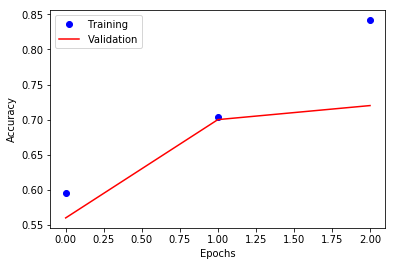

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training')
plt.plot(epochs, val_acc, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

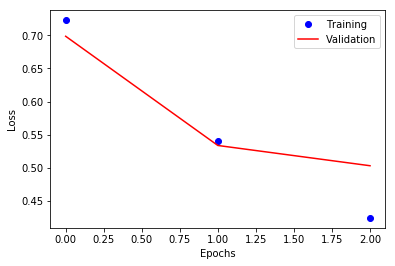

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

l1 = history.history['loss']
l2 = history.history['val_loss']

epochs = range(len(l1))

plt.plot(epochs, l1, 'bo', label='Training')
plt.plot(epochs, l2, 'r', label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
output_x = (validation_generator[0][0])
output_y = validation_generator[0][1]

loss_and_acc = model.evaluate(output_x, output_y)
print('loss = ' + str(loss_and_acc[0]))
print('accuracy = ' + str(loss_and_acc[1]))

500/500 [==============================] - 60s 120ms/step
loss = 0.4844456217288971
accuracy = 0.7640000009536743
